#WeatherWizard: A weather prediction ML model

Downloading the data from NOAA (National Ocenic and Atmospheric Administration)

In [1]:
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

weather = pd.read_csv("/Users/atanumondal/Desktop/WeatherWizard-main/data.csv", index_col="DATE")

In [4]:
weather.head()

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1975-03-20,IN018103100,"PATIALA, IN",NaN,NaN,66.0,86.0,57.0
1975-03-24,IN018103100,"PATIALA, IN",NaN,NaN,75.0,NaN,55.0
1975-04-06,IN018103100,"PATIALA, IN",NaN,NaN,80.0,NaN,72.0
1975-04-08,IN018103100,"PATIALA, IN",NaN,NaN,76.0,86.0,NaN
1975-04-09,IN018103100,"PATIALA, IN",NaN,NaN,77.0,86.0,59.0


Checking the ratio of null values in each column


In [5]:
weather.shape[0]

16443

In [6]:
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
PRCP        7471
SNWD       16440
TAVG         234
TMAX        2214
TMIN        4832
dtype: int64

In [7]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.454357
SNWD       0.999818
TAVG       0.014231
TMAX       0.134647
TMIN       0.293864
dtype: float64

Picking out core parameters as per documentation and renaming them

In [8]:
core_weather = weather[["PRCP", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow_depth", "temp_max", "temp_min"]

In [9]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.454357
snow_depth    0.999818
temp_max      0.134647
temp_min      0.293864
dtype: float64

In [10]:
core_weather["snow_depth"].value_counts()

3.1    2
7.1    1
Name: snow_depth, dtype: int64

In [11]:
core_weather

,precip,snow_depth,temp_max,temp_min
DATE,,,,
1975-03-20,NaN,NaN,86.0,57.0
1975-03-24,NaN,NaN,NaN,55.0
1975-04-06,NaN,NaN,NaN,72.0
1975-04-08,NaN,NaN,86.0,NaN
1975-04-09,NaN,NaN,86.0,59.0
...,...,...,...,...
2023-08-12,NaN,NaN,97.0,83.0
2023-08-13,NaN,NaN,96.0,82.0
2023-08-14,NaN,NaN,95.0,81.0


In [12]:
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1975-03-20,NaN,86.0,57.0
1975-03-24,NaN,NaN,55.0
1975-04-06,NaN,NaN,72.0
1975-04-08,NaN,86.0,NaN
1975-04-09,NaN,86.0,59.0
...,...,...,...
2023-08-11,NaN,97.0,80.0
2023-08-12,NaN,97.0,83.0
2023-08-13,NaN,96.0,82.0


In [14]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00     0.409658
0.02     0.010217
0.04     0.009427
0.08     0.008818
0.12     0.008210
           ...   
7.76     0.000061
0.73     0.000061
1.60     0.000061
10.42    0.000061
5.31     0.000061
Name: precip, Length: 305, dtype: float64

Filling the missing values as 0

In [15]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [16]:
core_weather.apply(pd.isnull).sum()

precip         0
temp_max    2214
temp_min    4832
dtype: int64

In [17]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1975-04-08,0.00,86.0,NaN
1975-04-12,0.00,95.0,NaN
1975-04-14,0.00,95.0,NaN
1975-04-20,0.00,NaN,NaN
1975-04-22,0.00,NaN,NaN
...,...,...,...
2023-07-27,0.00,95.0,NaN
2023-07-30,0.00,94.0,NaN
2023-08-02,0.00,98.0,NaN


In [18]:
core_weather = core_weather.fillna(method="ffill")

In [19]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [20]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [21]:
core_weather.index

Index(['1975-03-20', '1975-03-24', '1975-04-06', '1975-04-08', '1975-04-09',
       '1975-04-12', '1975-04-13', '1975-04-14', '1975-04-15', '1975-04-17',
       ...
       '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
       '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16'],
      dtype='object', name='DATE', length=16443)

Converting date from object datatype to datetime

In [22]:
core_weather.index = pd.to_datetime(core_weather.index)

In [23]:
core_weather.index

DatetimeIndex(['1975-03-20', '1975-03-24', '1975-04-06', '1975-04-08',
               '1975-04-09', '1975-04-12', '1975-04-13', '1975-04-14',
               '1975-04-15', '1975-04-17',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14',
               '2023-08-15', '2023-08-16'],
              dtype='datetime64[ns]', name='DATE', length=16443, freq=None)

In [24]:
core_weather.index.year

Int64Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=16443)

Checking for any data that has not been received

In [25]:
core_weather.apply(lambda x:(x==9999)).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

Analysing the data

<AxesSubplot:xlabel='DATE'>

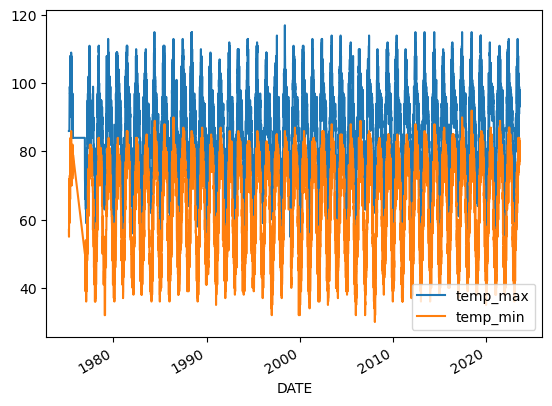

In [26]:
core_weather[["temp_max", "temp_min"]].plot()

In [27]:
core_weather.index.year.value_counts().sort_index()

1975    102
1976     15
1977    365
1978    365
1979    317
1980    366
1981    365
1982    365
1983    365
1984    366
1985    326
1986    317
1987    354
1988    325
1989    319
1990    269
1991    343
1992    352
1993    291
1994    318
1995    312
1996    342
1997    329
1998    348
1999    351
2000    362
2001    363
2002    360
2003    363
2004    361
2005    360
2006    362
2007    356
2008    364
2009    361
2010    357
2011    358
2012    366
2013    365
2014    365
2015    365
2016    363
2017    362
2018    364
2019    364
2020    366
2021    361
2022    360
2023    228
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

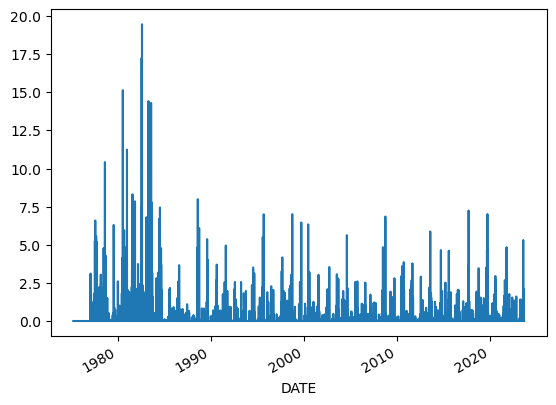

In [28]:
core_weather["precip"].plot()

Year-wise rain count

In [29]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1975      0.00
1976      0.00
1977     96.64
1978     79.53
1979     13.06
1980     96.22
1981     65.76
1982    101.89
1983    114.35
1984     72.83
1985     20.81
1986     19.56
1987      7.74
1988     27.33
1989     17.85
1990     19.00
1991     26.26
1992     23.96
1993     13.31
1994     27.69
1995     37.41
1996     26.10
1997     20.78
1998     29.14
1999     17.73
2000     24.73
2001     14.10
2002     15.84
2003     24.30
2004     23.06
2005     19.32
2006     11.88
2007     13.52
2008     45.40
2009     18.48
2010     34.12
2011     28.07
2012     13.22
2013     25.55
2014     20.01
2015     29.18
2016     13.91
2017     29.99
2018     31.03
2019     30.88
2020     29.43
2021     25.37
2022     17.44
2023     24.88
Name: precip, dtype: float64

<AxesSubplot:xlabel='DATE'>

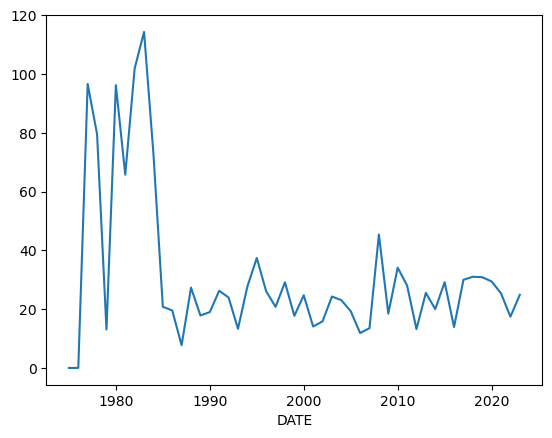

In [30]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

Training Machine learning model

In [31]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [32]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0
...,...,...,...,...
2023-08-12,0.0,97.0,83.0,96.0
2023-08-13,0.0,96.0,82.0,95.0
2023-08-14,0.0,95.0,81.0,97.0


Removing last row, because the target value cannot be predicted for that

In [33]:
core_weather = core_weather.iloc[:-1,:].copy()

In [34]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0
...,...,...,...,...
2023-08-11,0.0,97.0,80.0,97.0
2023-08-12,0.0,97.0,83.0,96.0
2023-08-13,0.0,96.0,82.0,95.0


# below algo and changes by amon

In [40]:
X=core_weather[["precip","temp_max","temp_min"]]
X.head()

,precip,temp_max,temp_min
DATE,,,
1975-03-20,0.0,86.0,57.0
1975-03-24,0.0,86.0,55.0
1975-04-06,0.0,86.0,72.0
1975-04-08,0.0,86.0,72.0
1975-04-09,0.0,86.0,59.0


In [41]:
y=core_weather["target"]
y.head()

DATE
1975-03-20    86.0
1975-03-24    86.0
1975-04-06    86.0
1975-04-08    86.0
1975-04-09    95.0
Name: target, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [44]:
##Model development

In [45]:
from sklearn.linear_model import Ridge

reg = Ridge()

In [46]:
reg.fit(X_train,y_train)

Ridge()

In [47]:
y_pred=reg.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)


11.55741938901307

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9279549300937121

In [50]:
y_test.head(10)

DATE
1990-04-29     94.0
2015-05-05    107.0
2003-10-22     94.0
1994-12-03     73.0
1977-07-25     90.0
2022-10-30     89.0
2002-07-22     93.0
1977-01-07     75.0
2023-01-18     70.0
2001-09-18     94.0
Name: target, dtype: float64

In [51]:
pd.DataFrame(y_pred).head(10)

,0
0,96.237631
1,104.050129
2,89.664755
3,75.548037
4,89.033678
5,87.857153
6,94.399363
7,75.010723
8,68.258743
9,92.980636


# Gaussian naive bias

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb=GaussianNB()

In [54]:
nb.fit(X_train,y_train)

GaussianNB()

In [55]:
y_predNB=nb.predict(X_test)

In [56]:
r2_score(y_test,y_pred)

0.9279549300937121

In [59]:
#y

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predNB))
print('MSE:', metrics.mean_squared_error(y_test, y_predNB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predNB)))

MAE: 3.5124670585850395
MSE: 25.161362254206367
RMSE: 5.016110271336384


# GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
grad=GradientBoostingRegressor(loss="quantile")

In [113]:
grad.fit(X_train,y_train)

GradientBoostingRegressor(loss='quantile')

In [114]:
y_pred=grad.predict(X_test)

In [115]:
r2_score(y_test,y_pred)

0.8537291765207686

[CV] END criterion=squared_error, learning_rate=0.2, loss=huber, max_depth=9, n_estimators=100; total time=   9.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=squared_error, max_depth=3, n_estimators=200; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=5, n_estimators=700; total time=  18.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=5, n_estimators=700; total time=  18.0s
[CV] END criterion=squared_error, learning_rate=0.3, loss=huber, max_depth=12, n_estimators=1000; total time= 2.7min
[CV] END criterion=squared_error, learning_rate=0.2, loss=absolute_error, max_depth=12, n_estimators=1000; total time= 1.5min
[CV] END criterion=squared_error, learning_rate=0.2, loss=absolute_error, max_depth=12, n_estimators=1000; total time= 1.8min
[CV] END criterion=friedman_mse, learning_rate=0.4, loss=squared_error, max_depth=12, n_estimators=700; total time=  15.8s
[CV] END criterion=friedman_mse, learning

[CV] END criterion=squared_error, learning_rate=0.2, loss=huber, max_depth=9, n_estimators=100; total time=   9.8s
[CV] END criterion=friedman_mse, learning_rate=0.4, loss=absolute_error, max_depth=7, n_estimators=1000; total time=  34.9s
[CV] END criterion=squared_error, learning_rate=0.3, loss=huber, max_depth=12, n_estimators=1000; total time= 3.0min
[CV] END criterion=squared_error, learning_rate=0.2, loss=absolute_error, max_depth=12, n_estimators=1000; total time= 1.6min
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_depth=9, n_estimators=100; total time=   5.1s
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_depth=9, n_estimators=100; total time=   5.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=huber, max_depth=12, n_estimators=100; total time=  26.1s
[CV] END criterion=friedman_mse, learning_rate=0.5, loss=squared_error, max_depth=12, n_estimators=700; total time=  15.8s
[CV] END criterion=friedman_mse, l

[CV] END criterion=squared_error, learning_rate=0.5, loss=quantile, max_depth=3, n_estimators=700; total time=   8.4s
[CV] END criterion=squared_error, learning_rate=0.2, loss=huber, max_depth=9, n_estimators=100; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=5, n_estimators=700; total time=  18.5s
[CV] END criterion=friedman_mse, learning_rate=0.3, loss=squared_error, max_depth=12, n_estimators=700; total time=  15.2s
[CV] END criterion=squared_error, learning_rate=0.3, loss=huber, max_depth=12, n_estimators=1000; total time= 3.1min
[CV] END criterion=squared_error, learning_rate=0.2, loss=absolute_error, max_depth=12, n_estimators=1000; total time= 1.5min
[CV] END criterion=friedman_mse, learning_rate=0.2, loss=absolute_error, max_depth=9, n_estimators=100; total time=   6.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=huber, max_depth=12, n_estimators=100; total time=  26.7s
[CV] END criterion=friedman_mse, learning_rate=0

[CV] END criterion=squared_error, learning_rate=0.5, loss=quantile, max_depth=3, n_estimators=700; total time=   8.4s
[CV] END criterion=squared_error, learning_rate=0.2, loss=huber, max_depth=9, n_estimators=100; total time=   8.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=huber, max_depth=5, n_estimators=700; total time=  18.6s
[CV] END criterion=friedman_mse, learning_rate=0.3, loss=squared_error, max_depth=12, n_estimators=700; total time=  15.3s
[CV] END criterion=squared_error, learning_rate=0.3, loss=huber, max_depth=12, n_estimators=1000; total time= 2.4min
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=absolute_error, max_depth=12, n_estimators=1000; total time= 2.6min
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=huber, max_depth=12, n_estimators=100; total time=  27.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=huber, max_depth=9, n_estimators=100; total time=  10.8s
[CV] END criterion=squared_error, learning_rate=0.2, los

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:

# Define the model
model = GradientBoostingRegressor()

# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [100,200,500,700,1000],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5, 7,9,12],
                   'learning_rate': [0.01, 0.1,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

# Tune the model using GridSearchCV
#grid = GridSearchCV(model,, hyperparameters, cv=5)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
grid_after_cv= RandomizedSearchCV(estimator = model, param_distributions = hyperparameters,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)





In [77]:
grid_after_cv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'n_estimators': [100, 200, 500, 700,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [78]:
grid_after_cv.best_params_
"""'n_estimators': 1000,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}"""

{'n_estimators': 1000,
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [79]:
Ypred_cv=grid_after_cv.predict(X_test)

In [80]:
r2_score(y_test,Ypred_cv)

0.9309599149189861

In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, Ypred_cv))
print('MSE:', metrics.mean_squared_error(y_test, Ypred_cv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Ypred_cv)))

MAE: 2.0671882219736135
MSE: 11.075361839086527
RMSE: 3.3279666222915347


# ARIMA model

In [67]:
core_weather.head()

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0


In [68]:
#arima can only be applicable to stationary data

the horizontal distribution indicates it is stationary time series


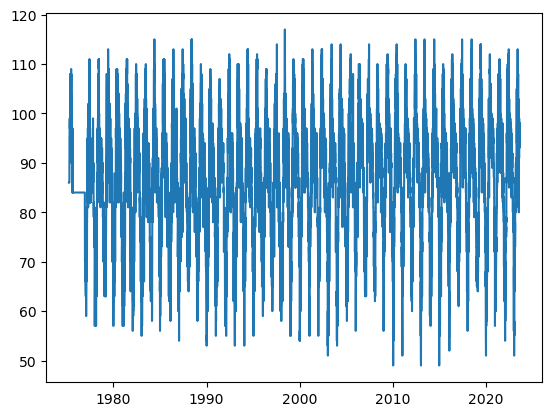

In [69]:
#Data is stationary 
import matplotlib.pyplot as plt
plt.plot(core_weather.target)
print("the horizontal distribution indicates it is stationary time series")

In [70]:
y=core_weather["target"].tail(10)
print(y)

DATE
2023-08-06    94.0
2023-08-07    95.0
2023-08-08    96.0
2023-08-09    96.0
2023-08-10    97.0
2023-08-11    97.0
2023-08-12    96.0
2023-08-13    95.0
2023-08-14    97.0
2023-08-15    98.0
Name: target, dtype: float64


In [71]:

#here we are forecasting the next 7 days max temperature

In [72]:

from statsmodels.tsa.arima.model import ARIMA
# Define the ARIMA model
model = ARIMA(y, order=(5,1,0))

# Fit the model
model_fit = model.fit()

# Make a prediction
prediction = model_fit.predict(start=len(y), end=len(y)+7)

print(prediction)


/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-08-16    97.264871
2023-08-17    96.200146
2023-08-18    96.833450
2023-08-19    96.863090
2023-08-20    96.259736
2023-08-21    96.179650
2023-08-22    97.183858
2023-08-23    97.302425
Freq: D, Name: predicted_mean, dtype: float64
